#**Adidas Sales Analysis**

**Project Description**

This analysis aims to provide a comprehensive examination of Adidas sales data to uncover meaningful insights, predict future sales trends, and implement machine learning techniques to classify high sales performance. This project leverages various data analysis and visualization techniques, machine learning models, and time series forecasting to offer a holistic understanding of the sales dynamics.

# **1. Importing Libraries**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# **2. Data Loading**



In [ ]:
# Read and Load the csv file dataset
adidas_data = pd.read_csv("01_Adidas Sales Analysis.csv")

In [ ]:
# Displays the first few rows of the dataset
adidas_data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,"Tuesday, October 26, 2021",Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750,24062.5,0.35,Outlet
1,Foot Locker,1185732,"Wednesday, October 27, 2021",Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250,30375.0,0.30,Outlet
2,Foot Locker,1185732,"Thursday, October 28, 2021",Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750,117562.5,0.55,Outlet
3,Foot Locker,1185732,"Friday, October 29, 2021",Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250,19687.5,0.35,Outlet
4,Foot Locker,1185732,"Saturday, October 30, 2021",Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250,24500.0,0.40,Outlet


In [ ]:
# Displays the last few rows of the dataset
adidas_data.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,West Gear,1128299,"Saturday, March 14, 2020",West,Nevada,Las Vegas,Women,Apparel,56,170,9520,1713.60,0.18,Outlet
9644,West Gear,1128299,"Sunday, March 15, 2020",West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980,1192.00,0.40,Outlet
9645,West Gear,1128299,"Monday, March 16, 2020",West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495,1123.75,0.25,Outlet
9646,West Gear,1128299,"Tuesday, March 17, 2020",West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328,1397.76,0.42,Outlet
9647,West Gear,1128299,"Wednesday, March 18, 2020",West,Nevada,Las Vegas,Women,Athletic Footwear,26,96,2496,848.64,0.34,Outlet


# **3. Data Cleaning and Preprocessing**

In [ ]:
adidas_shape = adidas_data.shape
adidas_columns = adidas_data.columns
adidas_dtypes = adidas_data.dtypes
adidas_unique_counts = adidas_data.nunique()

print(f"Adidas shape :{adidas_shape},\n \nAdidas columns: \n{adidas_columns},\n \nAdidas dtypes: \n{adidas_dtypes}\n")

Adidas shape :(9648, 14),
 
Adidas columns: 
Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object'),
 
Adidas dtypes: 
Retailer             object
Retailer ID           int64
Invoice Date         object
Region               object
State                object
City                 object
Gender Type          object
Product Category     object
Price per Unit        int64
Units Sold            int64
Total Sales           int64
Operating Profit    float64
Operating Margin    float64
Sales Method         object
dtype: object



In [ ]:
# For handling missing values
adidas_missing = adidas_data.isnull()
adidas_missing_count = adidas_missing.sum()
print(adidas_missing_count)

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


<Axes: >

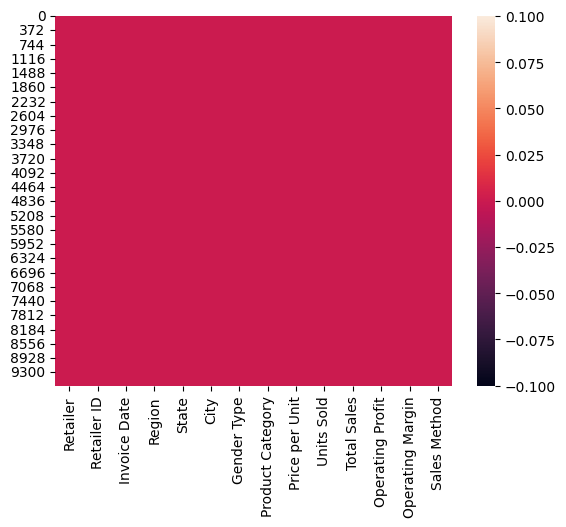

In [ ]:
# Plot of missing values
sns.heatmap(adidas_missing)

# **4. Data Analysis Techniques**



In [ ]:
# For descriptive statistic of the dataset
adidas_data.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [ ]:
# Value counts of the numeric data in the dataset
adidas_count_region = adidas_data["Region"].value_counts()
adidas_count_state = adidas_data["State"].value_counts()
adidas_count_city = adidas_data["City"].value_counts()
adidas_count_gender_type = adidas_data["Gender Type"].value_counts()
adidas_count_product_category = adidas_data["Product Category"].value_counts()
adidas_count_price_per_unit = adidas_data["Price per Unit"].value_counts()
adidas_count_unit_sold = adidas_data["Units Sold"].value_counts()
adidas_count_total_sales = adidas_data["Total Sales"].value_counts()
adidas_count_operating_profit = adidas_data["Total Sales"].value_counts()
adidas_count_sales_method = adidas_data["Sales Method"].value_counts()
adidas_count_retailer = adidas_data["Retailer"].value_counts()

print(f"State Value Counts:\n \n{adidas_count_state}\n")
print(f"City Value Counts:\n \n{adidas_count_city}\n")

State Value Counts:
 
State
California        432
Texas             432
New York          360
Florida           360
Pennsylvania      216
Mississippi       216
Utah              216
Tennessee         216
Alabama           216
Louisiana         216
Virginia          216
Oklahoma          216
Arkansas          216
Idaho             216
New Mexico        216
Arizona           216
Oregon            216
Rhode Island      216
Georgia           216
Nevada            216
New Hampshire     216
Connecticut       216
Massachusetts     216
Vermont           216
Michigan          144
Delaware          144
Colorado          144
Hawaii            144
West Virginia     144
Maryland          144
Maine             144
Montana           144
New Jersey        144
Ohio              144
Wisconsin         144
Illinois          144
North Dakota      144
Wyoming           144
Alaska            144
South Dakota      144
South Carolina    144
North Carolina    144
Kentucky          144
Missouri          144
Iowa

# **5. Visual Insight**

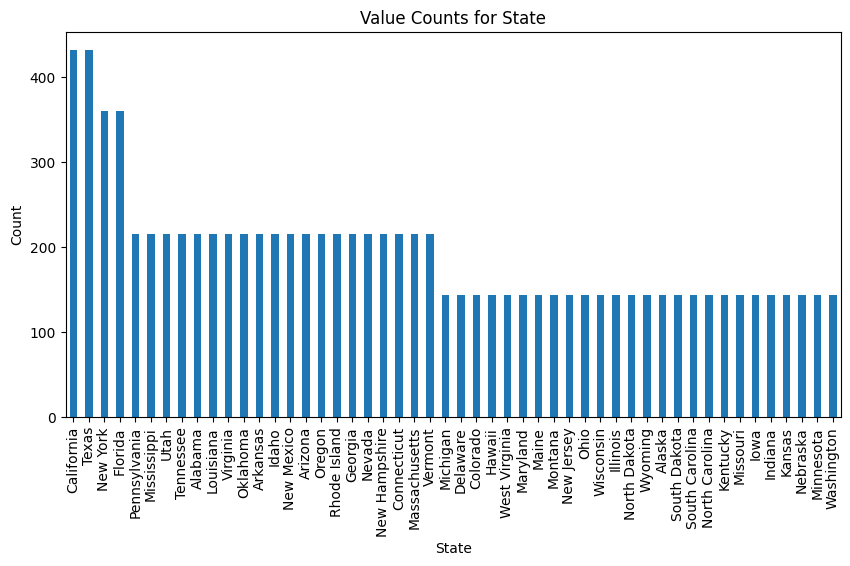

In [ ]:
# Plot of Value Counts for State
plt.figure(figsize = (10, 5))
adidas_count_state.plot(kind = "bar")
plt.title("Value Counts for State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

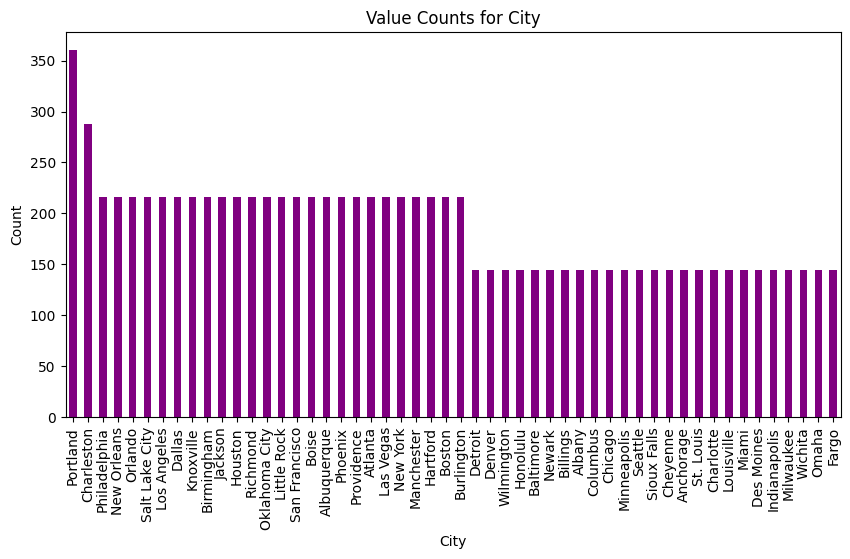

In [ ]:
# Plot of Value Counts for City
plt.figure(figsize=(10, 5))
adidas_count_city.plot(kind = "bar", color = "purple")
plt.title("Value Counts for City")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

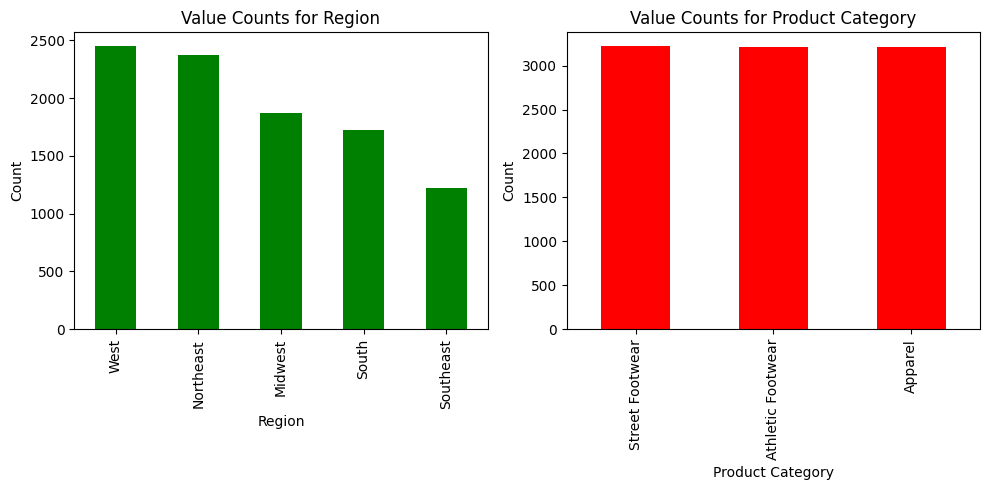

In [ ]:
# Plot of Value Counts for Region
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
adidas_count_region.plot(kind="bar", color = 'green', ax = axes[0])
axes[0].set_title("Value Counts for Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Count")

# Plot of Value Counts for Product Category
adidas_count_product_category.plot(kind = "bar", color = "red", ax = axes[1])
axes[1].set_title("Value Counts for Product Category")
axes[1].set_xlabel("Product Category")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

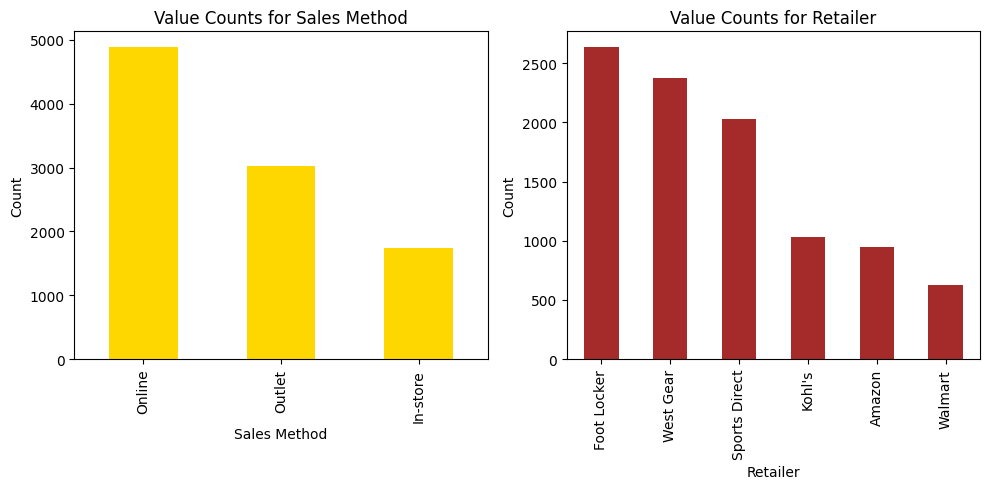

In [ ]:
# Plot of Value Counts for Sales Method
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
adidas_count_sales_method.plot(kind = "bar", color = "gold", ax = axes[0])
axes[0].set_title("Value Counts for Sales Method")
axes[0].set_xlabel("Sales Method")
axes[0].set_ylabel("Count")

# Plot of Value Counts for Retailer
adidas_count_retailer.plot(kind = "bar", color = "brown", ax = axes[1])
axes[1].set_title("Value Counts for Retailer")
axes[1].set_xlabel("Retailer")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Retailer
Amazon            949
Foot Locker      2637
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
dtype: int64


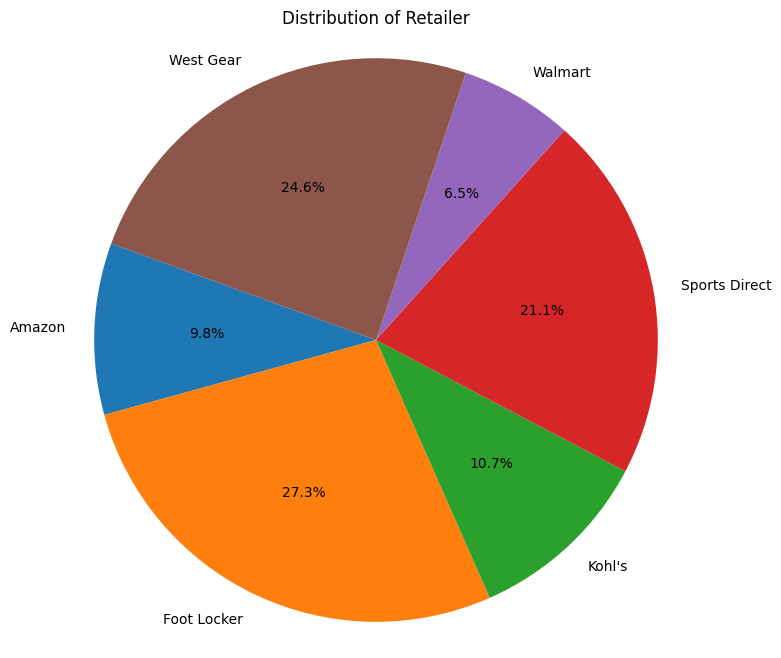

In [ ]:
retailer_size = adidas_data.groupby("Retailer").size()
print(retailer_size)

# Pie chart for Distribution of Retailer
plt.figure(figsize = (8,8))
plt.pie(retailer_size, labels= retailer_size.index, autopct= "%1.1f%%", startangle = 160)
plt.title("Distribution of Retailer")
plt.axis("equal")
plt.show()

Retailer
Amazon            949
Foot Locker      2637
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
dtype: int64


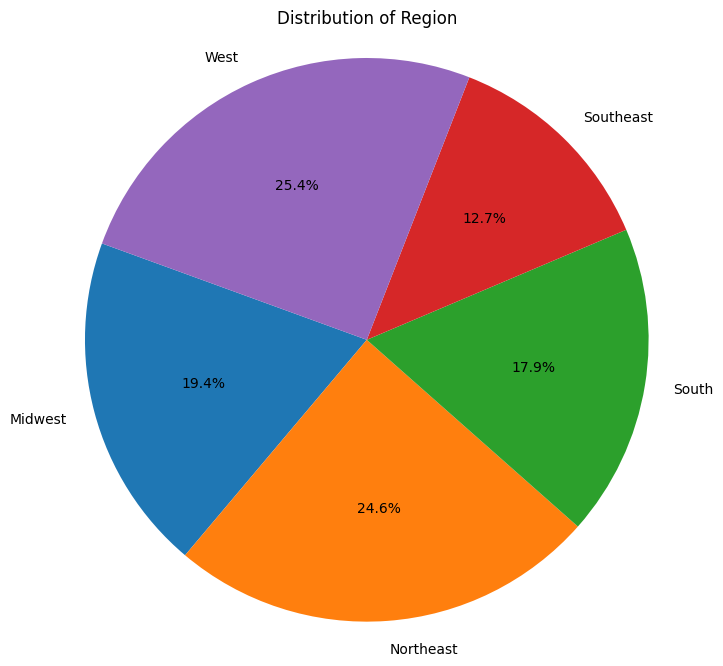

In [ ]:
region_size = adidas_data.groupby("Region").size()
print(retailer_size)

# Pie chart for Distribution of Region
plt.figure(figsize = (8,8))
plt.pie(region_size, labels= region_size.index, autopct= "%1.1f%%", startangle = 160)
plt.title("Distribution of Region")
plt.axis("equal")
plt.show()

Product Category
Apparel              3214
Athletic Footwear    3216
Street Footwear      3218
dtype: int64


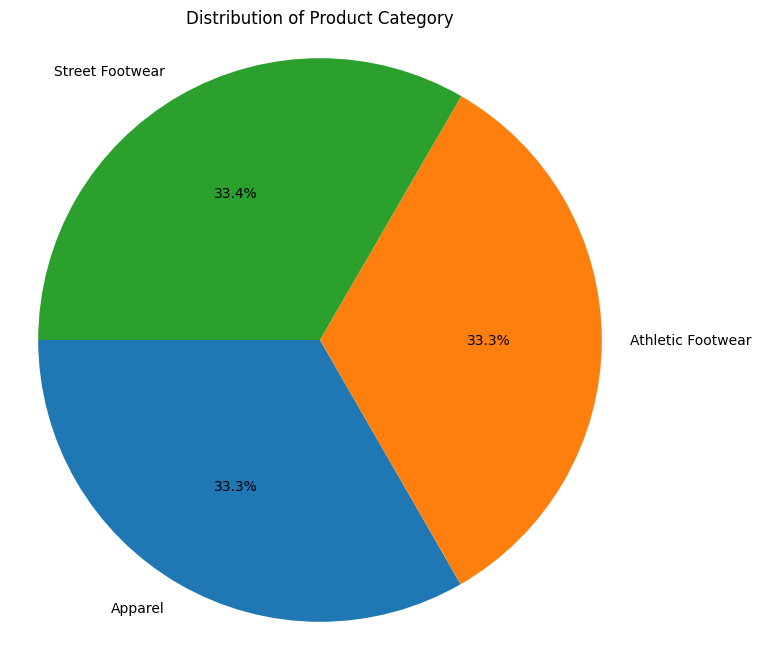

In [ ]:
product_size = adidas_data.groupby("Product Category").size()
print(product_size)

# Pie chart for Distribution of Product Category
plt.figure(figsize = (8,8))
plt.pie(product_size, labels= product_size.index, autopct= "%1.1f%%", startangle = 180)
plt.title("Distribution of Product Category")
plt.axis("equal")
plt.show()

Retailer
Amazon            949
Foot Locker      2637
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
dtype: int64


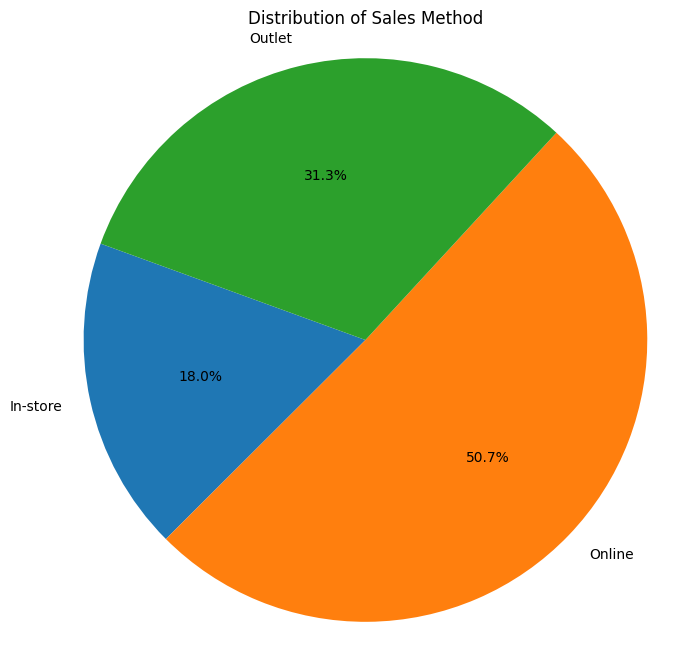

In [ ]:
method_size = adidas_data.groupby("Sales Method").size()
print(retailer_size)

# Pie chart for Distribution of Sales Method
plt.figure(figsize = (8,8))
plt.pie(method_size, labels= method_size.index, autopct= "%1.1f%%", startangle = 160)
plt.title("Distribution of Sales Method")
plt.axis("equal")
plt.show()

# **6. Data Visualization**

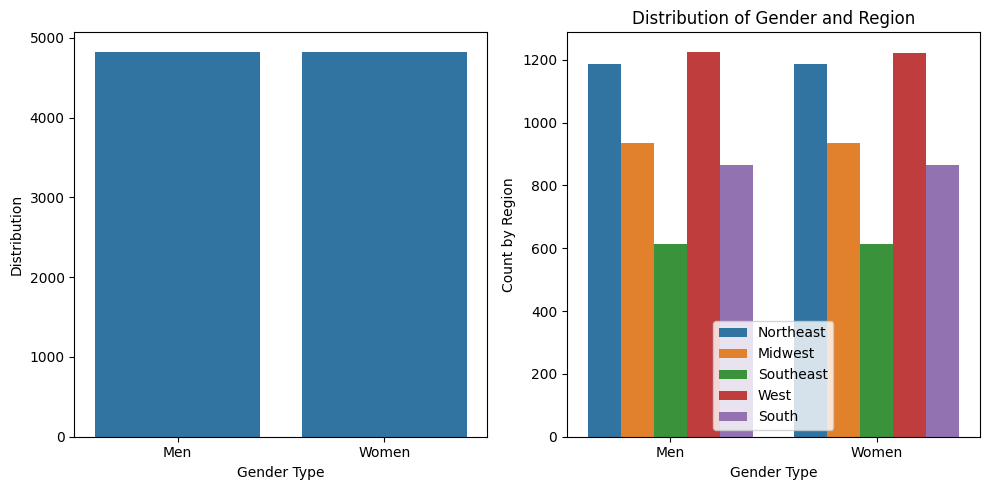

In [ ]:
# Plot for Distribution of Gender Type
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adidas_data, x="Gender Type", ax = axes[0])
axes[0].set_xlabel("Gender Type")
axes[0].set_ylabel("Distribution")

# Plot for Distribution of Gender Type and Region
sns.countplot(data= adidas_data, x= "Gender Type", hue = "Region", ax = axes[1])
axes[1].set_xlabel("Gender Type")
axes[1].set_ylabel("Count by Region")
axes[1].set_title("Distribution of Gender and Region")
plt.legend(loc="lower center")
plt.tight_layout()
plt.show()

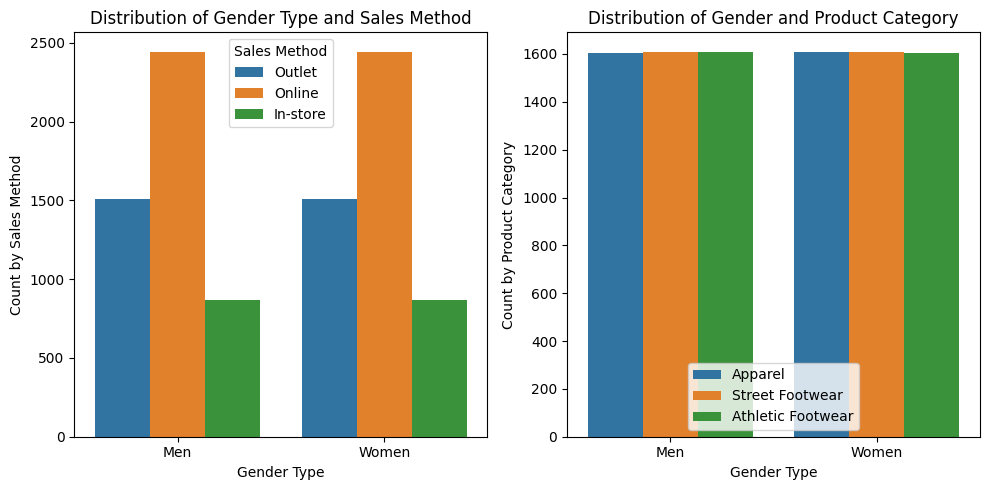

In [ ]:
# Plot for Distribution of Gender Type and Sales Method
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data = adidas_data, x = "Gender Type", hue = "Sales Method", ax = axes[0])
axes[0].set_xlabel("Gender Type")
axes[0].set_ylabel("Count by Sales Method")
axes[0].set_title("Distribution of Gender Type and Sales Method")

# Plot for Distribution of Gender Type and Product Category
sns.countplot(data = adidas_data, x = "Gender Type", hue = "Product Category", ax = axes[1])
axes[1].set_xlabel("Gender Type")
axes[1].set_ylabel("Count by Product Category")
axes[1].set_title("Distribution of Gender and Product Category")

plt.legend(loc="lower center")
plt.tight_layout()
plt.show()

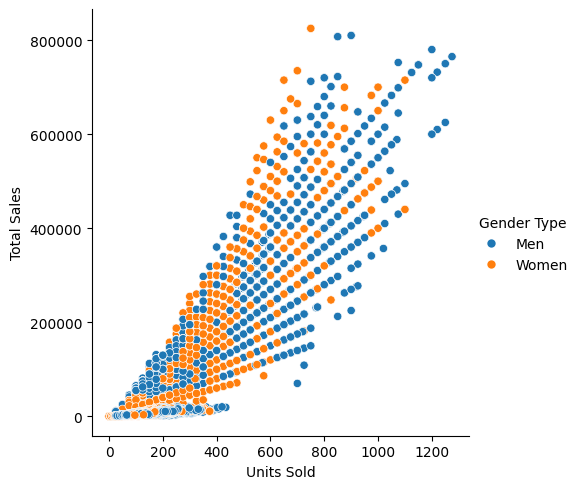

In [ ]:
# Plot of Total Sales and Unit Sold per Gender Type
sns.relplot(data = adidas_data, x = "Units Sold", y = "Total Sales", hue = "Gender Type" )

# **7. Implementation of Machine Learning**

In [ ]:
# For Data Preparation
adidas_cleaned = adidas_data.drop(["Retailer ID", "State", "City"], axis=1)

threshold = adidas_cleaned["Total Sales"].median()
adidas_cleaned["High_Sales"] = (adidas_cleaned["Total Sales"] > threshold).astype(int)
adidas_cleaned = adidas_cleaned.drop(["Total Sales"], axis=1)
adidas_dummies = pd.get_dummies(adidas_cleaned, drop_first=True)

In [ ]:
x = adidas_dummies.drop("High_Sales", axis=1)
y = adidas_dummies["High_Sales"]

In [ ]:
# Split the data into traing and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making prediction
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9509499136442142
Confusion Matrix:
[[1376   52]
 [  90 1377]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1428
           1       0.96      0.94      0.95      1467

    accuracy                           0.95      2895
   macro avg       0.95      0.95      0.95      2895
weighted avg       0.95      0.95      0.95      2895



# **8. Time Series Forecasting**

In [ ]:
adidas_data["Invoice Date"] = pd.to_datetime(adidas_data["Invoice Date"])
adidas_data.set_index("Invoice Date", inplace=True)
monthly_sales = adidas_data["Total Sales"].resample('M').sum()

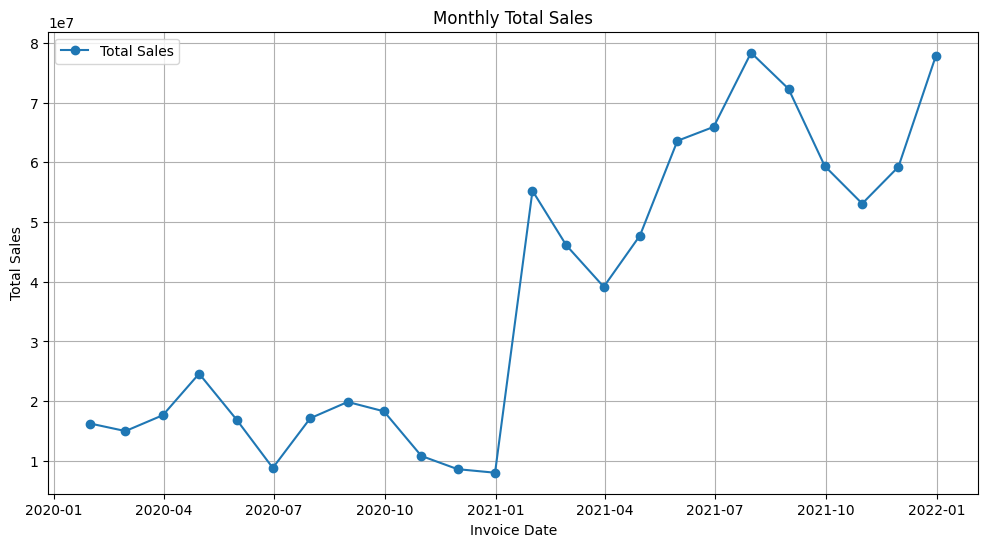

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label="Total Sales",marker = 'o', linestyle = "-")
plt.title("Monthly Total Sales")
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
adf_test = adfuller(monthly_sales)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

ADF Statistic: -0.8391906168655257
p-value: 0.8073382697223422


In [ ]:
monthly_sales_diff = monthly_sales.diff().dropna()

adf_test_diff = adfuller(monthly_sales_diff)
print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
print(f"p-value (Differenced): {adf_test_diff[1]}")

ADF Statistic (Differenced): -4.594841522662277
p-value (Differenced): 0.00013202726256274837


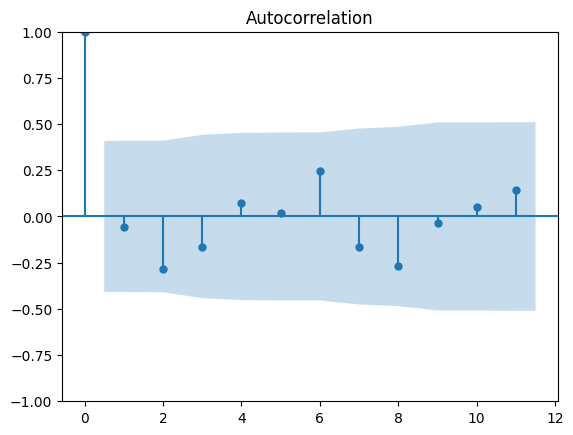

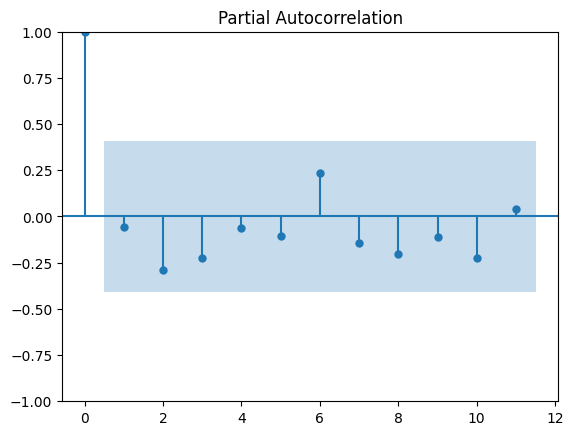

In [ ]:
plot_acf(monthly_sales_diff)
plot_pacf(monthly_sales_diff)
plt.show()

In [ ]:
# Building ARIMA Model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -408.961
Date:                Sat, 25 May 2024   AIC                            823.923
Time:                        13:44:26   BIC                            827.329
Sample:                    01-31-2020   HQIC                           824.780
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4577      2.255      0.203      0.839      -3.961       4.877
ma.L1         -0.5938      1.760     -0.337      0.736      -4.043       2.855
sigma2      1.866e+14        nan        nan        n

In [ ]:
forecast_steps = 12  # Forecast for the next 12 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps, freq="M")
forecast_values = forecast.predicted_mean
forecast_conf = forecast.conf_int()

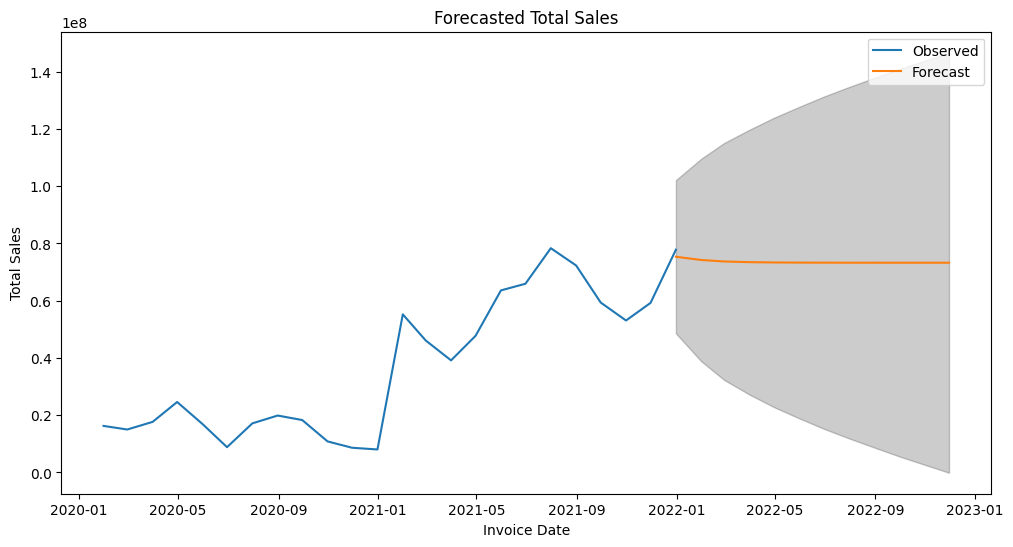

In [ ]:
# Plot for Forecasted Total Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label="Observed")
plt.plot(forecast_index, forecast_values, label="Forecast")
plt.fill_between(forecast_index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color="k", alpha=0.2)
plt.title("Forecasted Total Sales")
plt.xlabel("Invoice Date")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

# **9. Conlusion**

This analysis demonstrates the power of data science in predicting high sales for Adidas.

**1. Highly Accurate Sales Prediction Model:**

*   A Logistic Regression model achieved an impressive 95.1% accuracy. This means it can effectively distinguish between high and low sales based on the provided data (excluding total sales).
*   The chosen features within the model are highly informative when it comes to predicting sales performance.

**2. Balanced Classification Performance:**

*   The confusion matrix reveals a well-balanced classification. The model accurately identified a large portion of both high-sales (96%) and low-sales (94%) instances in the test set.
*   This balance is crucial for ensuring the model's effectiveness in real-world scenarios with a mix of sales outcomes.

**3. Identifying Key Sales Drivers:**

By analyzing the model coefficients, we can pinpoint the features with the strongest influence on predicting high sales. This knowledge can be invaluable for:
*   Targeted Marketing: Develop marketing campaigns and promotions tailored to specific customer segments or product categories linked to high sales.
*   Product Development: Focus efforts on product categories with a demonstrated association with high sales performance.
*   Strategic Resource Allocation: Allocate resources (advertising budget, inventory) strategically based on predicted sales trends.

**4. Enhanced Customer Targeting:**

By leveraging the model's prediction capabilities, Adidas can target high-potential customers with personalized marketing strategies. This can significantly improve conversion rates and generate higher sales revenue.

**5. Dynamic Resource Optimization:**

The model empowers Adidas to dynamically allocate resources based on predicted sales trends. This proactive approach optimizes resource utilization (advertising budget, inventory) and maximizes return on investment.

**6. Importance of Data-Driven Decision Making:**

This analysis highlights the critical role of data-driven decision making. By utilizing historical sales data and building predictive models, Adidas gains valuable insights to:

*   Improve sales forecasting
*   Optimize resource allocation
*   Enhance customer targeting
*   Make strategic business decisions

Overall Impact:

This data-driven approach holds tremendous potential for Adidas to gain a competitive edge. It allows for improved sales forecasting, resource optimization, and personalized customer targeting. By continuously collecting and analyzing sales data, Adidas can refine its predictive models and stay ahead in the competitive market.

# **Time Series Analysis for Adidas Sales Forecasting**

**Seasonality and Stationarity:**

*   The analysis suggests a seasonal pattern in Adidas' monthly sales data, likely influenced by holidays, back-to-school seasons, or summer vacations.
*   By differencing the data (taking the difference between consecutive months), stationarity was achieved. This is a critical step for building an ARIMA model, which requires stable data.

**Forecasted Sales Trend:**

*   The ARIMA(1, 1, 1) model predicts a modest upward trend in Adidas' total sales for the next year.

**Confidence Interval and Uncertainty:**

*   The forecast includes a confidence interval (shaded area) that widens for future months. This indicates a higher degree of uncertainty in the predictions as we move further out in time. This is a natural limitation of time series forecasting, as predicting the future with high accuracy becomes increasingly difficult.

**Benefits of Data-Driven Forecasting:**

The visualization provides valuable insights for Adidas to:
*   Plan Inventory: By anticipating future sales trends, Adidas can optimize inventory levels to avoid stockouts or excess inventory holding costs.
*   Allocate Resources: Based on the sales forecast, Adidas can strategically allocate resources like staffing or marketing budgets to meet the anticipated demand.
*   Identify Potential Issues: Significant deviations between forecasted and actual sales could signal changes in market trends or competitor activity, prompting further investigation and corrective actions.
Importance of Continuous Improvement:

Overall, by continuously analyzing sales data and refining forecasting models, Adidas can gain a data-driven advantage in its business operations. This can lead to improved decision-making, optimized resource allocation, and ultimately, increased sales and profitability.